In [1]:
import pandas as pd
import ast

In [2]:
def extraer_codebleu(valor):
    if isinstance(valor, str):
        try:
            dic = ast.literal_eval(valor)
            return dic.get('codebleu')
        except (ValueError, SyntaxError):
            return None
    return None 

def readDataset(file_name0):
    dataset0 = pd.read_csv(f"results/{file_name0}", sep="\t", encoding='latin-1')
    dataset0['CodeBleuScore_Real'] = dataset0['CodeBleuScore'].apply(extraer_codebleu)
    return dataset0

In [3]:
baselineDataset = readDataset("results-baseline_00_00_002_deepseek-r1-distill-qwen-7b.csv")
modifiquedPromptDataset = readDataset("results-test_2025-04-17 07_08_59_deepseek-r1-distill-qwen-7b_persona001-programmer.csv")

In [4]:
dataset = pd.merge(baselineDataset, modifiquedPromptDataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('_baseline', '_test0'))
dataset.dropna()
print()

Text(0, 0.5, 'Puntaje (rango entre 0 y 1)')

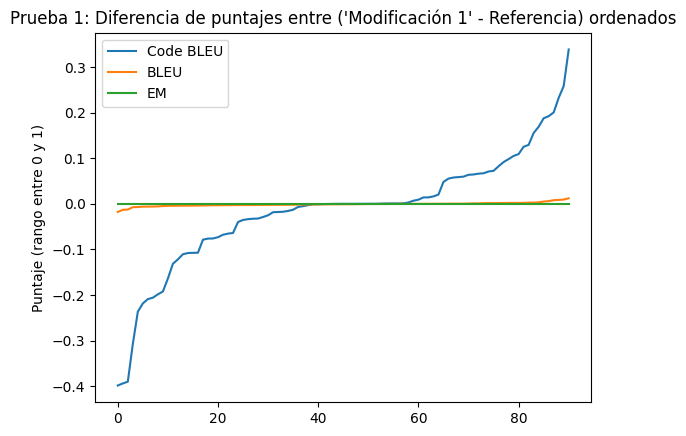

In [5]:
import matplotlib.pyplot as plt

dataset["CodeBleu_Dif"] = dataset["CodeBleuScore_Real_test0"] - dataset["CodeBleuScore_Real_baseline"]
dataset["Bleu_Dif"] = dataset["BleuScore_test0"] - dataset["BleuScore_baseline"]
dataset["EM_Dif"] = dataset["ExactMatchScore_test0"] - dataset["ExactMatchScore_baseline"]
CodeBleu_Dif = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif"].tolist()
Bleu_Dif = dataset.sort_values(by=["Bleu_Dif"])["Bleu_Dif"].tolist()
EM_Dif = dataset.sort_values(by=["EM_Dif"])["EM_Dif"].tolist()

plt.plot(range(len(CodeBleu_Dif)), CodeBleu_Dif, label="Code BLEU")
plt.plot(range(len(Bleu_Dif)), Bleu_Dif, label="BLEU")
plt.plot(range(len(EM_Dif)), EM_Dif, label="EM")

plt.legend()

plt.title("Prueba 1: Diferencia de puntajes entre ('Modificación 1' - Referencia) ordenados")
plt.ylabel("Puntaje (rango entre 0 y 1)")

In [6]:
test002Dataset = readDataset("results-test_2025-04-17 11_28_39_deepseek-r1-distill-qwen-7b_persona001-programmer.csv")
dataset = pd.merge(dataset, test002Dataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('', '_test1'))
dataset.dropna()


dataset["CodeBleu_Dif_test2"] = dataset["CodeBleuScore_Real"] - dataset["CodeBleuScore_Real_baseline"]
dataset["Bleu_Dif_test2"] = dataset["BleuScore"] - dataset["BleuScore_baseline"]
dataset["EM_Dif_test2"] = dataset["ExactMatchScore"] - dataset["ExactMatchScore_baseline"]

Text(0, 0.5, 'Puntaje (rango entre 0 y 1)')

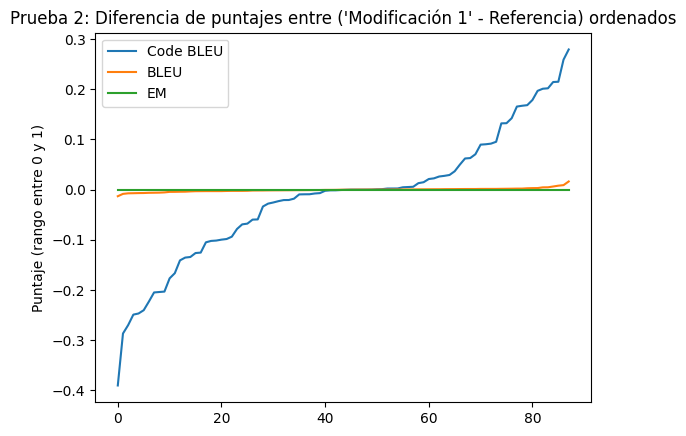

In [7]:
CodeBleu_Dif = dataset.sort_values(by=["CodeBleu_Dif_test2"])["CodeBleu_Dif_test2"].tolist()
Bleu_Dif = dataset.sort_values(by=["Bleu_Dif_test2"])["Bleu_Dif_test2"].tolist()
EM_Dif = dataset.sort_values(by=["EM_Dif_test2"])["EM_Dif_test2"].tolist()

plt.plot(range(len(CodeBleu_Dif)), CodeBleu_Dif, label="Code BLEU")
plt.plot(range(len(Bleu_Dif)), Bleu_Dif, label="BLEU")
plt.plot(range(len(EM_Dif)), EM_Dif, label="EM")

plt.legend()

plt.title("Prueba 2: Diferencia de puntajes entre ('Modificación 1' - Referencia) ordenados")
plt.ylabel("Puntaje (rango entre 0 y 1)")

Text(0, 0.5, 'Puntaje (rango entre 0 y 1)')

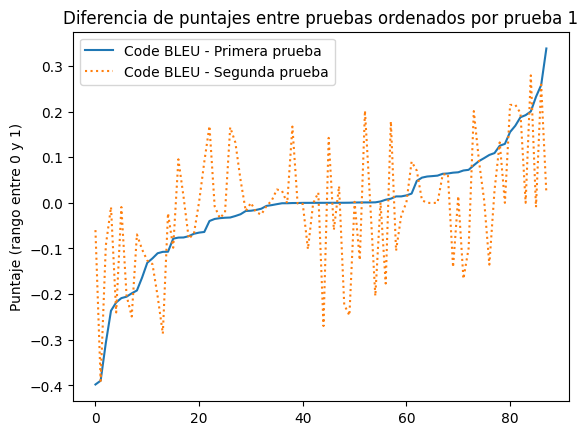

In [8]:
CodeBleu_Dif_test1 = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif"].tolist()
CodeBleu_Dif_test2 = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif_test2"].tolist()

plt.plot(range(len(CodeBleu_Dif_test1)), CodeBleu_Dif_test1, label="Code BLEU - Primera prueba")
plt.plot(range(len(CodeBleu_Dif_test2)), CodeBleu_Dif_test2, label="Code BLEU - Segunda prueba", linestyle='dotted')

plt.legend()

plt.title("Diferencia de puntajes entre pruebas ordenados por prueba 1")
plt.ylabel("Puntaje (rango entre 0 y 1)")